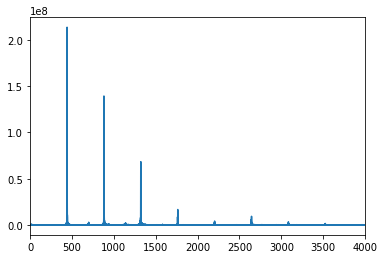

In [2]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
import numpy as np

#rate, data = wav.read('boulevard_of_broken_dreams.wav')
rate, data = wav.read('08593822.wav')

length = np.shape(data)[0]/rate #length of song... not used here, but defined it just incase
deltaT = length/np.shape(data)[0] #time increment per sample... also can be expressed as 1/rate
samples = np.shape(data)[0] #number of samples in data. this particular .wav (08593822) uses 16bit samples

fft_out = fft(data)
fft_abs = np.abs(fft_out)
freqs = fftfreq(samples,1/rate)

plt.plot(freqs, fft_abs)
plt.xlim(0,4000)
plt.show()

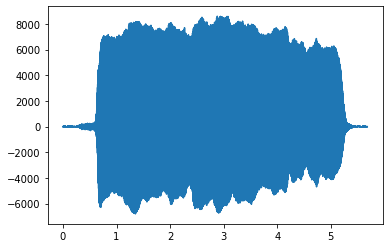

In [4]:
#waveform plot
timeDomainAxis = np.linspace(start = 0, stop = 5.68, num = np.shape(data)[0])
plt.plot(timeDomainAxis, data)
plt.savefig('waveform.png')

In [6]:
#mode of the sound... in this case it's an instrument, 
#so it will be the key the instrument plays
#used online tone generator to see if this was the key playing.
#checks out! (key of A4)
print(str(freqs[np.argmax(fft_abs)]) +' Hz')

440.4929577464789 Hz


In [7]:
#split sound data into multiple arrays
#this is your fourier sample space time domain. That is, samples of the song that 
# we will perform the fft on.
import timeit

import time
start_time = time.time()

data_split = np.array_split(data,500)
design_matrix = []
for i in range(len(data_split)):
    fft_out = fft(data_split[i])
    fft_abs = np.abs(fft_out)
    #samples = len(data_split[i])
    #freqs = fftfreq(samples,1/rate)
    design_matrix.append(fft_abs)
    
print(time.time()-start_time)


#elapsed_time = timeit.timeit(code_to_test, number=100)/100
#print(elapsed_time)

0.030515193939208984


(0, 4000)

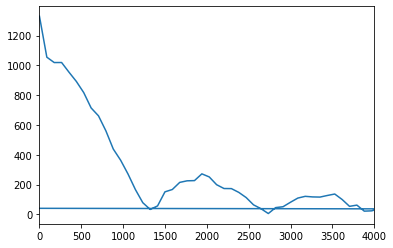

In [8]:
samples = len(fft_abs)
freqs = fftfreq(samples,1/rate)
plt.plot(freqs,fft_abs)
plt.xlim(0,4000)



(0, 4000)

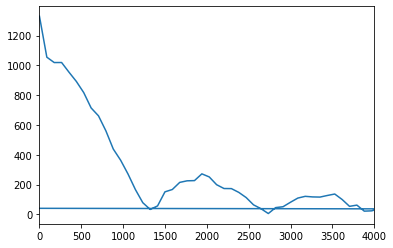

In [9]:
samples = len(design_matrix[-1])
freqs = fftfreq(samples,1/rate)
plt.plot(freqs,design_matrix[-1]) #same as above
plt.xlim(0,4000)


(0, 4000)

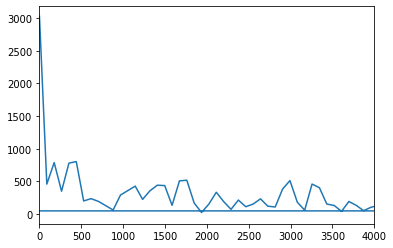

In [10]:
design_matrix_index = 10 #should be either noise or have peak at 0, due to the pause before the flute starts 
samples = len(design_matrix[design_matrix_index])
freqs = fftfreq(samples,1/rate)
plt.plot(freqs,design_matrix[design_matrix_index]) 
plt.xlim(0,4000)



(0, 4000)

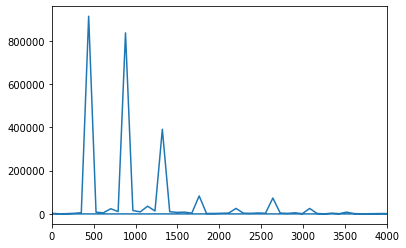

In [11]:
design_matrix_index = 300 #should be global max at 440 
samples = len(design_matrix[design_matrix_index])
freqs = fftfreq(samples,1/rate)
plt.plot(freqs,design_matrix[design_matrix_index]) 
plt.xlim(0,4000)

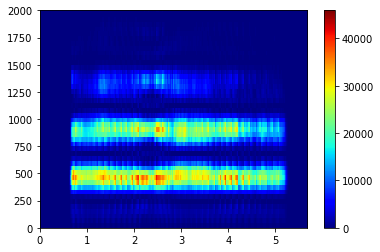

0.3046121597290039


In [15]:
#an alternative....
from scipy import signal

start_time = time.time()
#rate,data = wav.read('08593822.wav')
#rate, data = wav.read('boulevard_of_broken_dreams.wav')
#data = (data[:,0]+data[:,1]) / 2 #for stereo audio
#data = data[:,0]
frequencies, times, spectrogram = signal.spectrogram(data,rate,nfft=1000)
#plt.pcolormesh(times, frequencies, spectrogram)


plt.imshow(spectrogram,extent=[0,np.max(times),0,np.max(frequencies)],cmap='jet',aspect='auto',origin='lowest')
           
           #,vmax = abs(spectrogram).max()
          #,vmin=abs(spectrogram).min(),aspect='auto')

plt.colorbar()
plt.ylim(0,2000)
plt.savefig('clarinet.png')


plt.show()

print(time.time()-start_time)

#frequencies

(0, 2000)

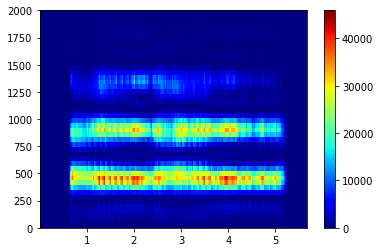

In [13]:
plt.pcolormesh(times, frequencies, spectrogram,cmap='jet')
plt.colorbar()
plt.ylim(0,2000)

Max Frequency: 445.41
index in spectrogram of displayed fft: 925


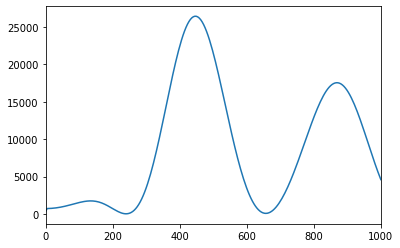

In [496]:
from scipy.signal import find_peaks
#np.shape(spectrogram[:,0])
#len(frequencies)
#spectrogram
dt = np.max(times)/len(spectrogram[0])
time = 4.7
plt.plot(frequencies, spectrogram[:,int(time/dt)])
plt.xlim(0,1000)
print('Max Frequency: '+str(frequencies[np.argmax(spectrogram[:,int(time/dt)])]))
print('index in spectrogram of displayed fft: ' + str(int(time/dt)))
#print(1118*dt)
#print(np.max(times))
#find_peaks(spectrogram[:,int(time/dt)])

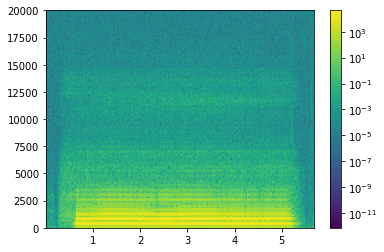

In [498]:
import matplotlib.colors as colors
plt.pcolormesh(times, frequencies, spectrogram, norm=colors.LogNorm(vmin=spectrogram.min(), vmax=spectrogram.max()))
plt.ylim(0,20000)
plt.colorbar()

In [323]:
frequencies, times, spectrogram = signal.spectrogram(data,rate,nperseg=2000)

In [325]:
frequencies

array([    0.,    24.,    48., ..., 23952., 23976., 24000.])

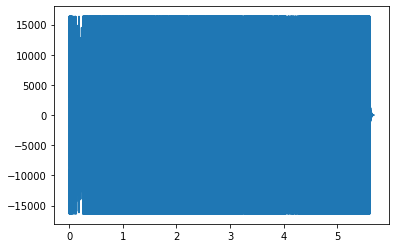

In [332]:
plt.rcParams['agg.path.chunksize'] = 10000
timeDomainAxis = np.linspace(start = 0, stop = 5.68, num = np.shape(data)[0])
plt.plot(timeDomainAxis, data)
#plt.yscale('log')

In [368]:
a = np.array(([-7,-7,3],[0,1,3]),dtype =np.int16)

np.shape(a)

a



array([[-7, -7,  3],
       [ 0,  1,  3]], dtype=int16)

In [376]:
rate, data = wav.read('boulevard_of_broken_dreams.wav')
data

array([[-9321, 15459],
       [-9947, 16610],
       [-8994, 15571],
       ...,
       [    0,    -1],
       [   -3,     1],
       [    2,     0]], dtype=int16)

In [3]:
rate, data = wav.read('boulevard_of_broken_dreams.wav')
#data = (data[:,0]+data[:,1]) / 2 #for stereo audio

#frequencies, times, spectrogram = signal.spectrogram(data,rate,nfft=300)
wav.write('output.wav',rate,data[:,0])